In [142]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os

In [143]:
df_list = []

path = '../Data/'

for data in os.listdir(path):
    if data.split(".")[1] == 'csv':
        df = pd.read_csv(path + data)
        df_list.append(df)

data = pd.concat(
    df_list, ignore_index=False
)
df = data.copy()
df = df.drop(columns=['Unnamed: 0'])

nan_df = df[df['Content'].isna()]
nan_df.to_csv('nan_df.csv', index=False)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187267 entries, 0 to 402
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Title                187267 non-null  object
 1   Content              129541 non-null  object
 2   Content_url          187267 non-null  object
 3   News_type            187266 non-null  object
 4   Day_month_year_hour  187267 non-null  object
 5   Img_url              187267 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [145]:
df = df.dropna()
df = df.drop_duplicates()
print(f"len df {len(df)}")

len df 122551


In [146]:
def split_date_to_year(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = "20" + date.split('.')[2]
    return year

def split_date_to_month(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[1]
    return year

def split_date_to_day(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[0]
    return year

df['Yeary'] = df['Day_month_year_hour'].apply(split_date_to_year)
df['Month'] = df['Day_month_year_hour'].apply(split_date_to_month)
df['Day'] = df['Day_month_year_hour'].apply(split_date_to_day)

df = df.drop(columns=['Day_month_year_hour'])

<Axes: ylabel='News_type'>

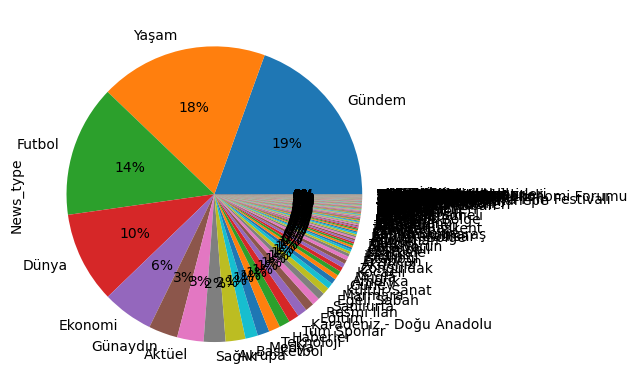

In [147]:
df.News_type.value_counts().plot(kind='pie', autopct='%1.f%%')

In [148]:
def categorize_news_type(news_type, types_list, return_type):
    if news_type in types_list:
        return return_type
    else:
        return news_type

In [149]:
with open("../Preprocess-Data/iller.txt", 'r', encoding='utf-8') as f:
    cities = f.readlines()

cities = [city.strip() for city in cities] + [
    'Kayseri Bölge', 'Karadeniz - Doğu Anadolu', 'Egeli Sabah', 'Marmara', 'Ankara Başkent', 'Akdeniz',
    'Güney'
    ]
    
df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=cities, return_type='Yerel')

In [150]:
sports_teams = [
    "Beşiktaş", "Futbol", "Fenerbahçe",  "Galatasaray", "Trabzonspor", 'Türkiye Kupası', 'Euro 2020',
    'TFF 1. Lig', 'Spor Magazin', 'Transfer Haberleri'
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=sports_teams, return_type='futbol')

In [151]:
gloabl_list = ['Amerika', "Avrupa"]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=gloabl_list, return_type='Dünya')

In [152]:
recipes_categories = [
    "Kahvaltılık Tarifler", "Çorbalar", "Sebze Yemekleri", "Vegan Tarifler", "Vejetaryen Tarifler",
    "Makarna Ve Pilav Tarifleri", "Yemek Tarifleri", "Kekler", "Salata ve Mezeler", 
    "Kurabiye Tarifleri", "Yemek", "Tatlılar", "Et Yemekleri", "Sağlıklı Tarifler",
    "Hamur İşi", 'Mutfak Sırları', 'İçecek Tarifleri', 'Tatlı Tarifleri', 'Börekler-Çörekler ve Poğaçalar',
    'Soslar ve İçecekler', 'Diğer Tarifler', 'Çorba Tarifleri', 'Pilav Tarifleri', 'Hamurişi Tarifleri',
    'Salata & Meze & Kanepe', 'Makarna Tarifleri', 'Bakliyat Yemekleri', 'Dolma-Sarma Tarifleri',
    'Sandviç Tarifleri', 'Aperatifler'
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=recipes_categories, return_type='Yemek Tarifleri')

In [153]:
health_topics = ["Sağlık", "Çocuk Sağlığı", "Ruh Sağlığı", "Kadın Sağlığı", "Erkek Sağlığı"]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=health_topics, return_type='Sağlık')

In [154]:
personal_care_categories = [
    "Makyaj", "Saç Bakımı", "Cilt Bakımı", "Güzellik"
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=personal_care_categories, return_type="Kişisel Bakım")

In [155]:
finans_categories = [
    "Finans Kripto Para Haberleri", "Ekonomi", "Finans Şirket Haberleri", "Finans Altın Haberleri", 
    "Finans Emtia-Döviz Haberleri", "Finans Borsa Haberleri", "Finans Gündem Haberleri", "Finans Ekonomi Haberleri",
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=finans_categories, return_type="Finans")

<Axes: ylabel='News_type'>

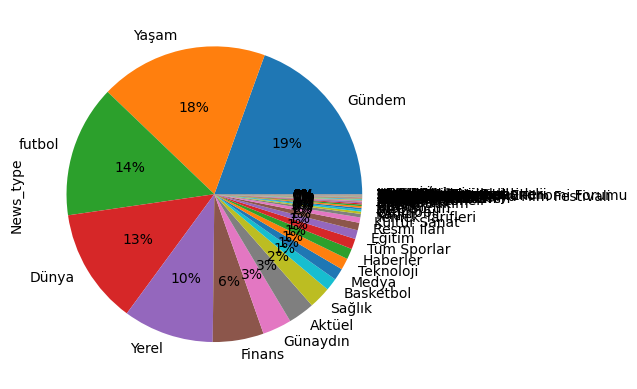

In [156]:
df.News_type.value_counts().plot(kind='pie', autopct='%1.f%%')

In [157]:
def show_news_types(index):
    return df['News_type'].value_counts()[index:index+20]

In [158]:
show_news_types(0)

Gündem             23866
Yaşam              22507
futbol             17701
Dünya              15483
Yerel              12139
Finans              6826
Günaydın            3902
Aktüel              3539
Sağlık              2947
Basketbol           1667
Medya               1601
Teknoloji           1535
Haberler            1436
Tüm Sporlar         1398
Eğitim              1187
Resmi İlan          1012
Kültür Sanat         720
Yemek Tarifleri      470
Kadın                307
Otomobil             270
Name: News_type, dtype: int64

In [159]:
show_news_types(20)

Turizm               226
Bize Sorun           226
Güncel               214
Çocuk                160
Kişisel Bakım        135
Spor                  90
Hamilelik             90
Bebek                 85
Pazar Sabah           76
Kamu Personeli        76
İLANLAR               65
Ramazan               57
Cumartesi Sabah       40
Ramazan Haberleri     39
Bebeğim ve Biz        29
Moda                  28
Aile ve İlişkiler     27
Emniyet Personeli     26
Diyet                 23
Beslenme              22
Name: News_type, dtype: int64

In [160]:
show_news_types(40)

Oyun                                   18
Bölgeler                               18
EMEKLİ                                 18
Uluslararası Antalya Film Festivali    17
Askeri Personel                        17
Sağlık Personeli                       13
Kitap                                  12
Öğretmen                               12
Elektrik Kesintisi                     11
İşte İnsan                             11
Keşfet                                 10
İlişkiler                              10
Temizlik                               10
Diyet Yemekleri                        10
Teknokulis                             10
Uluslararası Futbol Ekonomi Forumu      9
15 Temmuz İhaneti                       8
KPSS                                    8
Sözleşmeli Personel                     7
Seçim                                   7
Name: News_type, dtype: int64

In [161]:
show_news_types(60)

Rüya Tabirleri              7
Çocuklar İçin               7
Egzersizler                 6
Dini Hizmetler Personeli    5
Stil ve Öneri               5
Memurlar                    4
Dünya Kupası                4
Bebekler İçin               3
Güncel Memur Haberleri      3
Emlak                       3
Teknik Personel             3
Sürekli İşçi                2
Aile                        2
Astroloji                   2
Günün Duası                 2
Doğalgaz Kesintisi          1
Yeşil Ekran                 1
Gezegen Hareketleri         1
Akademik Personel           1
Hakim ve Savcı              1
Name: News_type, dtype: int64

In [162]:
show_news_types(80)

Engelli Memur        1
Vodafone Business    1
Güzel Sözler         1
Doğum                1
Basın İlan Kurumu    1
Name: News_type, dtype: int64

In [163]:
show_news_types(100)

Series([], Name: News_type, dtype: int64)